# PyTorch 实现线性回归

上一篇教程中，我们基本介绍了 pytorch 里面的操作单元，Tensor，以及计算图中的操作单位 Variable，相信大家都已经熟悉了。

今天这一部分，我们从这两个最基本的机器学习，线性回归以及 Logistic 回归来开始建立我们的计算图并进行计算。

由于我们本次介绍的主要是 pytorch 的教程，所以每个算法的太多数学背景以及推导过程就不再细讲了，需要的同学可以自己找相应的教材去了解。  
比如《统计学习方法》，《PRML》，周志华的《西瓜书》以及《机器学习实战》都可以了解到相应的内容。

## 1、线性回归

对于线性回归，我们这里简单地介绍一下一元线性回归。即给出一系列的点，找一条线，使得这条直线与这些点的距离之和最小。
![线性回归](img/pt_lr_1.jpg)
上面这张图就简单地描述了线性回归的基本原理，下面我们重点讲讲如何用 pytorch 写一个简单的线性回归。

In [26]:
# 引入第三方库
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

### 1.1、数据
首先我们需要给出一系列的点作为线性回归的数据，使用 numpy 来存储这些点。

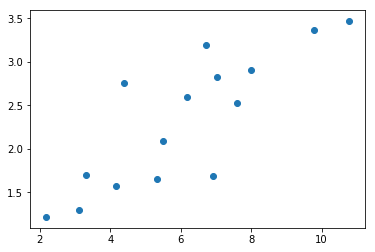

In [14]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 将数据点展示出来
def data_plot(data, label):
    fig = plt.figure()
    ax = fig.add_subplot(111)  # add_subplot(349)函数的参数的意思是，将画布分成3行4列图像画在从左到右从上到下第9块
    ax.scatter([data[:].flatten()],[label.T[:].flatten()])  # scatter 的x是 features，y是 label
    plt.show()

data_plot(x_train, y_train)

还记得 pytorch 里面的基本处理单元吗？ Tensor ，我们需要将 numpy 转换成 Tensor ，如果你还记得上一节的内容，那么你一定知道怎么转换，也就是这个函数 torch.from_numpy()

就像这样：

In [16]:
# 将 numpy 的 array 转换成为 Tensor
x_tensor = torch.from_numpy(x_train)
y_tensor = torch.from_numpy(y_train)

这样，我们的数据就转换成了 Tensor 。也就便于我们接下来的处理了。

### 1.2、模型
我们上一节讲了基本的模型框架，那么我们这一节就按照这个基本的框架来写出一个线性回归模型。

In [20]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        # 设置 线性回归
        self.linear = nn.Linear(1, 1)  # 输入和输出都是 1 维的
    # 定义前向传播函数，其实就是输出如何输出
    def forward(self, x):
        out = self.linear(x)
        return out
model = LinearRegression()

这里的 nn.Linear() 表示的是 y = w * x + b ，里面的两个参数都是 1，表示的是 x 是 1 维的，y 也是 1 维的。当然这里是可以根据你想要的输入输出维度来更改的，之前使用的别的框架的同学应该对这里也比较熟悉吧。

### 1.3、损失函数和优化器
模型定义完成了，接下来就是需要定义 loss 和 optimizer ，就是误差和优化函数

In [24]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

这里使用的是最小二乘 loss，之后我们做分类问题更多的使用的是 cross entropy loss，交叉熵。优化函数使用的是随机梯度下降，注意需要将 model 的参数 model.parameters() 传进去让这个函数知道它要优化的参数是哪些。

### 1.4、训练
该定义的都已经定义完成了，那我们开始训练吧。

In [28]:
# 设置迭代次数
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_tensor)
    target = Variable(y_tensor)

    # 前向传播
    out = model(inputs) 
    loss = criterion(out, target) # 计算loss
    # 反向传播
    optimizer.zero_grad() # 梯度归零
    loss.backward() # 反向传播
    optimizer.step() # 更新参数

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1,num_epochs,loss.data[0]))

D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch[20/1000], loss: 1.012389
Epoch[40/1000], loss: 0.880243
Epoch[60/1000], loss: 0.786731
Epoch[80/1000], loss: 0.720524
Epoch[100/1000], loss: 0.673615
Epoch[120/1000], loss: 0.640344
Epoch[140/1000], loss: 0.616712
Epoch[160/1000], loss: 0.599893
Epoch[180/1000], loss: 0.587888
Epoch[200/1000], loss: 0.579286
Epoch[220/1000], loss: 0.573090
Epoch[240/1000], loss: 0.568593
Epoch[260/1000], loss: 0.565298
Epoch[280/1000], loss: 0.562852
Epoch[300/1000], loss: 0.561007
Epoch[320/1000], loss: 0.559586
Epoch[340/1000], loss: 0.558466
Epoch[360/1000], loss: 0.557557
Epoch[380/1000], loss: 0.556798
Epoch[400/1000], loss: 0.556146
Epoch[420/1000], loss: 0.555569
Epoch[440/1000], loss: 0.555045
Epoch[460/1000], loss: 0.554559
Epoch[480/1000], loss: 0.554099
Epoch[500/1000], loss: 0.553659
Epoch[520/1000], loss: 0.553232
Epoch[540/1000], loss: 0.552815
Epoch[560/1000], loss: 0.552405
Epoch[580/1000], loss: 0.552001
Epoch[600/1000], loss: 0.551599
Epoch[620/1000], loss: 0.551201
Epoch[640/10

第一个循环表示每个 epoch，接着开始前向传播，然后计算 loss，然后反向传播，接着优化函数，特别注意的是，在每次方向传播的时候需要将参数的梯度归零，即
```python
optimzier.zero_grad()
```
### 1.5、验证
训练完成后，我们就可以开始测试模型了。

In [33]:
model.eval()
predict = model(Variable(x_tensor))
predict_np = predict.data.numpy()
print(predict_np)

[[ 0.71657908]
 [ 1.26995254]
 [ 1.82332587]
 [ 2.43203688]
 [ 2.5427115 ]
 [ 1.15324116]
 [ 3.97594905]
 [ 2.1664176 ]
 [ 2.87473559]
 [ 0.14660442]
 [ 2.59905481]
 [ 4.48505211]
 [ 1.72925258]
 [ 3.07948375]
 [ 0.61596572]]


特别注意的是，需要用 model.eval() ，让 model 变成测试模式，这主要是对 dropout 和 batch normalization 的操作在训练和测试的时候是不一样的。

我们使用 matplotlib 再次将图形画出来，来看一下对比照。

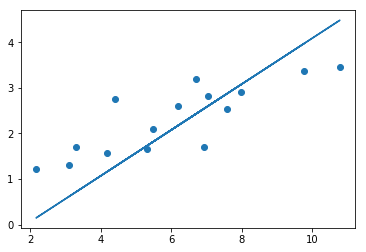

In [42]:
# 将回归线展示出来
def later_plot(data, label, yHat):
    fig = plt.figure()
    ax = fig.add_subplot(111)  # add_subplot(349)函数的参数的意思是，将画布分成3行4列图像画在从左到右从上到下第9块
    ax.scatter([data[:].flatten()],[label.T[:].flatten()])  # scatter 的x是 features，y是 label
    xCopy = data.copy()
    xCopy.sort()
    ax.plot(xCopy[:],yHat)
    plt.show()

later_plot(x_train, y_train, predict_np)

## 2、小结
ok，到这儿基本上就结束啦。我们使用了 pytorch 实现了简单的线性回归模型，掌握了 pytorch 的一些基本操作，下一节我们将使用 logistic 回归对 MNIST 手写字体数据集做识别。